In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import os
import warnings

warnings.filterwarnings('ignore')

# Configuração da pasta de imagens (Padrão do seu portfólio)
output_dir = 'main_files'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Ambiente configurado. As imagens serão salvas em '{output_dir}/'")

Ambiente configurado. As imagens serão salvas em 'main_files/'


In [5]:
print("\n--- Etapa 1: Geração de Dados Sintéticos ---")

# Configuração da semente para reprodutibilidade
np.random.seed(42)

# Número de amostras
n_samples = 1000

# Gerando Features (Variáveis Independentes)
# 1. Horas de Trabalho (entre 10 e 100)
horas = np.random.randint(10, 100, n_samples)

# 2. Material Gasto (valor contínuo entre 50 e 500)
material = np.random.uniform(50, 500, n_samples)

# 3. Complexidade do Projeto (1 a 5)
complexidade = np.random.randint(1, 6, n_samples)

# Gerando Target (Variável Dependente: Preço Final)
# Fórmula base: Preço = (Horas * 50) + (Material * 1.5) + (Complexidade * 200) + Ruído
ruido = np.random.normal(0, 200, n_samples) # Adiciona variação realista
preco = (horas * 50) + (material * 1.5) + (complexidade * 200) + ruido

# Criando o DataFrame
df = pd.DataFrame({
    'Horas_Trabalho': horas,
    'Custo_Material': material,
    'Nivel_Complexidade': complexidade,
    'Preco_Final': preco
})

print("Dataset Sintético gerado com sucesso!")
display(df.head())
print(df.describe())


--- Etapa 1: Geração de Dados Sintéticos ---
Dataset Sintético gerado com sucesso!


,Horas_Trabalho,Custo_Material,Nivel_Complexidade,Preco_Final
0,61,422.573399,4,4950.508980
1,24,387.725866,1,2020.045334
2,81,409.791709,5,6056.100291
3,70,421.309705,4,4883.681675
4,30,133.882244,4,2691.215439


       Horas_Trabalho  Custo_Material  Nivel_Complexidade  Preco_Final
count     1000.000000     1000.000000          1000.00000  1000.000000
mean        53.271000      277.465102             3.07100  3689.262068
std         26.364914      126.886047             1.42126  1384.800548
min         10.000000       50.106886             1.00000   688.465912
25%         30.000000      166.964310             2.00000  2600.348119
50%         54.000000      284.681911             3.00000  3669.856826
75%         74.000000      385.743510             4.00000  4805.859280
max         99.000000      499.709075             5.00000  6601.476228



--- Etapa 1.2: Análise Exploratória Visual ---


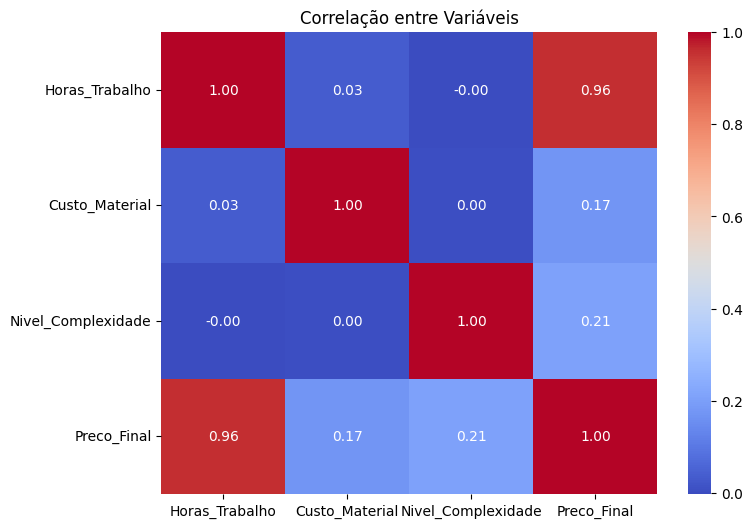

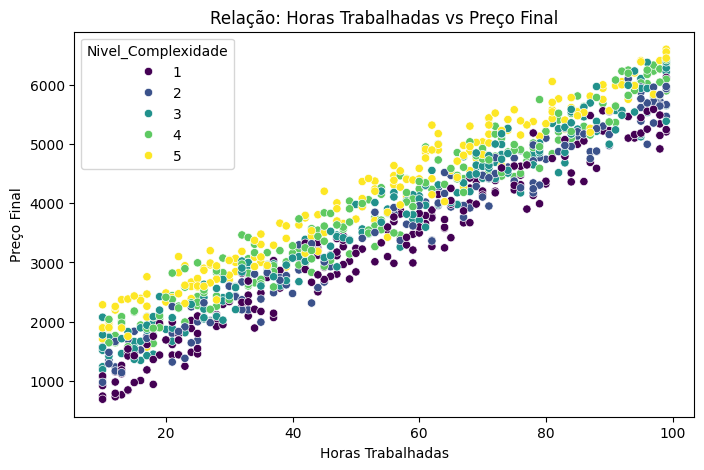

In [6]:
print("\n--- Etapa 1.2: Análise Exploratória Visual ---")

# 1. Mapa de Calor de Correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis')
plt.savefig(f'{output_dir}/1_heatmap_correlacao.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Gráfico de Dispersão (Horas vs Preço)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Horas_Trabalho', y='Preco_Final', data=df, hue='Nivel_Complexidade', palette='viridis')
plt.title('Relação: Horas Trabalhadas vs Preço Final')
plt.xlabel('Horas Trabalhadas')
plt.ylabel('Preço Final')
plt.savefig(f'{output_dir}/2_dispersao_horas_preco.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
print("\n--- Etapa 2: Pré-processamento e Divisão ---")

# Separando X (features) e y (target)
X = df.drop('Preco_Final', axis=1)
y = df['Preco_Final']

# Divisão Treino/Teste (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dados divididos e padronizados.")
print(f"Treino: {X_train.shape[0]} amostras | Teste: {X_test.shape[0]} amostras")


--- Etapa 2: Pré-processamento e Divisão ---
Dados divididos e padronizados.
Treino: 800 amostras | Teste: 200 amostras


In [8]:
print("\n--- Etapa 3: Seleção e Treinamento dos Modelos ---")

# Dicionário para armazenar os modelos
models = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR (Support Vector Regressor)": SVR(kernel='rbf')
}

# Dicionário para guardar resultados
results = {}

for name, model in models.items():
    print(f"Treinando {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Fazendo predições
    y_pred = model.predict(X_test_scaled)
    
    # Calculando Métricas
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2, "Preds": y_pred}

print("\n>>> Todos os modelos foram treinados.")


--- Etapa 3: Seleção e Treinamento dos Modelos ---
Treinando Regressão Linear...
Treinando Random Forest...
Treinando SVR (Support Vector Regressor)...

>>> Todos os modelos foram treinados.



--- Etapa 4: Avaliação e Comparação dos Resultados ---
Tabela de Performance (Ordenada pelo menor Erro):


,RMSE,MAE,R2
Regressão Linear,211.155261,175.211131,0.977618
Random Forest,246.995186,201.726139,0.969375
SVR (Support Vector Regressor),1343.313417,1132.990547,0.094145


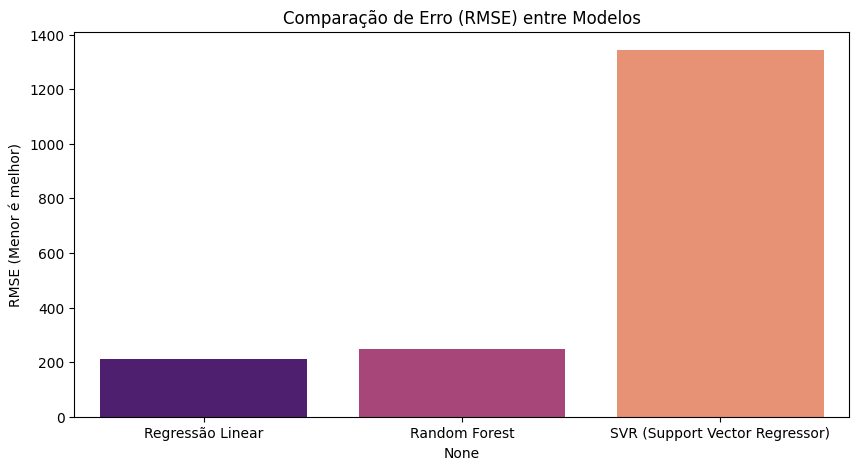

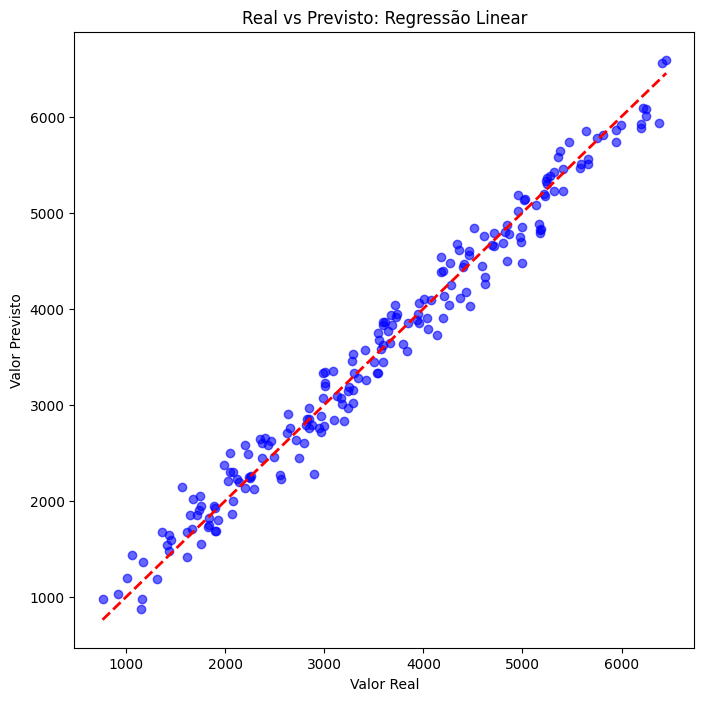

In [9]:
print("\n--- Etapa 4: Avaliação e Comparação dos Resultados ---")

# Criando DataFrame de Resultados
df_results = pd.DataFrame(results).T.drop(columns=['Preds']) # Removemos as predições da tabela visual
df_results = df_results.sort_values(by='RMSE', ascending=True)

print("Tabela de Performance (Ordenada pelo menor Erro):")
display(df_results)

# Visualização Comparativa (RMSE)
plt.figure(figsize=(10, 5))
sns.barplot(x=df_results.index, y=df_results['RMSE'], palette='magma')
plt.title('Comparação de Erro (RMSE) entre Modelos')
plt.ylabel('RMSE (Menor é melhor)')
plt.savefig(f'{output_dir}/3_comparacao_rmse.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualização Real vs Previsto (Melhor Modelo)
best_model_name = df_results.index[0]
y_pred_best = results[best_model_name]["Preds"]

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Linha perfeita
plt.title(f'Real vs Previsto: {best_model_name}')
plt.xlabel('Valor Real')
plt.ylabel('Valor Previsto')
plt.savefig(f'{output_dir}/4_real_vs_previsto.png', dpi=300, bbox_inches='tight')
plt.show()